# Extracting information from 2012 US election campaign (merging data) 

# What Is It About?

* The [Federal Election Commission](https://www.fec.gov/) publishes data on donations given to US election campaigns.

* Data available at https://www.fec.gov/data/browse-data/?tab=bulk-data.

* We will use the 2012 data (simply because it is smaller in volume).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

matplotlib.style.use('ggplot')
pd.set_option("display.max_columns", None)

<ipython-input-1-745464b1daa0>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


* We will investigate [2012 individual contributions](https://www.fec.gov/files/bulk-downloads/2012/indiv12.zip).

* Data includes donor names, address, occupation, and donation amount.

* The data file is separate from the [header file](https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv) which we will need to download separately.

In [2]:
headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv')
headers

<class 'urllib.error.URLError'>: <urlopen error [Errno 23] Host is unreachable>

* Now we can read the data itself.

In [3]:
fec = pd.read_csv('itcont.txt', sep="|", nrows=10, names=headers.columns)
fec.head(5)

<class 'NameError'>: name 'headers' is not defined

* The file we will read is large.

* When reading a file, we make pandas easier by giving it the data types of the columns.

* We give their data types with a dictionary. Here we are interested in the amount of the donation, which we will declare to be a number, while for all the rest we will handle them as strings.

In [4]:
data_types = { header: str for header in headers }
data_types['TRANSACTION_AMT'] = float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

* So now let's read all the data.

In [5]:
fec = pd.read_csv('itcont.txt', 
                  sep="|", 
                  names=headers.columns,
                  dtype=data_types)

fec.shape

(3372139, 21)

In [6]:
fec.sample(10)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
2594491,C00431445,A,30G,G2012,13963997537,22Y,IND,"LYNCH, JOAN",BOULDER,CO,80304,NaN,NaN,11192012,25.0,NaN,D93706,876050,NaN,NaN,4091520131197046207
2851304,C00431445,A,M9,P2012,13943439289,15,IND,"ROSSITER, KARLY",PHOENIX,AZ,85041,STATE OF ARIZONA,ATTORNEY,08202012,500.0,NaN,C19584485,897073,NaN,NaN,4121620131202217676
3177886,C00431171,A,12G,G2012,14941667506,15,IND,"PRICE, BRENT MR.",LONGVIEW,TX,75606,SELF-EMPLOYED,SERVICE MACHINE,10162012,250.0,NaN,SA17.3738738,933475,NaN,NaN,4071120141216873288
3354448,C00496497,N,M2,P2012,12950554286,15,IND,"BROUSSARD, LAWLESS MR. JR.",JOELTON,TN,37080,TRADES UNLIMTED,IND ELECT,01212012,200.0,NaN,SA17.186560,767151,NaN,NaN,4022220121151706273
239278,C00031054,A,M6,NaN,11932495946,15,IND,"JOHNSON, MICHAEL",HAMTRAMCK,MI,48212,SALES,SALES,05132011,400.0,NaN,11AI-000086866,746134,NaN,NaN,4092720111143375369
904531,C00431171,A,YE,P2012,13942689243,15,IND,"PROFETA, JOSEPH A. MR.",WARREN,NJ,07059,EMC,SALES,12132011,1500.0,NaN,SA17.595488,896726,NaN,NaN,4121120131200023910
213338,C00255695,N,M8,NaN,11932297497,15,IND,"DODDS, JUM",VANDERBILT,MI,49795,NaN,INFORMATION REQUESTED,07312011,250.0,NaN,SA11AI.28311,742748,NaN,NaN,4082220111142355003
826713,C00494971,N,YE,P,12020142886,15,IND,"WRIGHT, PETER W",LIGHTHOUSE POINT,FL,33064,HUDSON CAPITAL GROUP,CFO,12072011,500.0,NaN,SA0223101512194,767420,NaN,NaN,2022320121152263144
2356773,C00003418,A,12G,NaN,13940592707,15,IND,"NEISWONGER, RICHARD A. MR.",BUENA PARK,CA,90621,RETIRED,RETIRED,10122012,200.0,NaN,201212GL11AI23438,867755,NaN,NaN,4041920131187619506
1111077,C00295527,N,M4,NaN,12971140358,15,IND,"LANCASTER, ALICE MRS.",LOUISVILLE,KY,40222,INFORMATION REQUESTED,INFORMATION REQUESTED,03012012,300.0,NaN,A2012-821079,780078,NaN,NaN,4052120121156115194


* Unfortunately we notice that there is no information about the candidate to whom a donation is addressed.

* Donations are given to committees.

* The donation file indicates the committee in question with the `CMTE_ID' code.

* So we should turn to them and read the [committee file](https://www.fec.gov/files/bulk-downloads/2012/cm12.zip).

* As before, we should read [the header file](https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cm_header_file.csv) separately.

In [7]:
cm_headers =  pd.read_csv('https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cm_header_file.csv')
cm_headers

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID


* Having read the headings, we can read the data of the committees themselves.

In [8]:
cm = pd.read_csv('cm.txt', 
                  sep="|", 
                  names=cm_headers.columns)
print(cm.shape)
cm.head(5)

(14455, 15)


,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000042,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,"LYNCH, MICHAEL J. MR.",3600 WEST LAKE AVENUE,NaN,GLENVIEW,IL,60026.0,B,Q,NaN,Q,C,ILLINOIS TOOL WORKS INC.,NaN
1,C00000059,HALLMARK CARDS PAC,GREG SWARENS,2501 MCGEE,MD#288,KANSAS CITY,MO,64108.0,U,Q,UNK,M,C,NaN,NaN
2,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001.0,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
3,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107.0,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
4,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612.0,U,Q,UNK,Q,T,MEDICAL ASS'N; KANSAS [AMPAC],NaN


* To combine the committee data with the donation data, we should *join* them.

* To merge two `DataFrame`s in pandas we use the `merge()` method.

In [9]:
fec = pd.merge(fec, 
               cm[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], 
               on='CMTE_ID', 
               how='inner')

print(fec.shape)
fec.head(5)

(3372139, 23)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,01192011,250.0,NaN,INCA210,713442,NaN,NaN,4030920111137082784,"ATLAS PAC, FEDERAL",NaN
1,C00425645,A,M3,NaN,11930501656,15,IND,"LOWREY, LEE",NEWPORT BEACH,CA,92658,PACER COMMUNITIES,DIRECTOR OF FINANCE,02032011,500.0,NaN,PAYA212,717650,NaN,NaN,4031820111137613153,"ATLAS PAC, FEDERAL",NaN
2,C00425645,A,M3,NaN,11930501656,15,IND,"FEATHER, KATHRYN",GARDEN GROVE,CA,92840,COUNTY OF ORANGE,POLICY ADVISOR,02222011,250.0,NaN,INCA221,717650,NaN,NaN,4031820111137613154,"ATLAS PAC, FEDERAL",NaN
3,C00425645,A,M3,NaN,11930501656,15,IND,"TOBIN, KEVIN",COSTA MESA,CA,92626,UCI,ENGINEER,02222011,250.0,NaN,INCA219,717650,NaN,NaN,4031820111137613155,"ATLAS PAC, FEDERAL",NaN
4,C00425645,N,M5,NaN,11931295390,15,IND,"DREYER, MARY",DANA POINT,CA,92629,SANTA ANA USD,TEACHER,04272011,250.0,NaN,INCA248,727360,NaN,NaN,4050920111139806337,"ATLAS PAC, FEDERAL",NaN


* Unfortunately we note again that we do not see the full details of the candidate for whom each committee is raising money.

* There is only its code, `CAND_ID`.

* So we have to turn to the [candidates](https://www.fec.gov/files/bulk-downloads/2012/cn12.zip) file.

* And, as before, we should also get the corresponding [headers](https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cn_header_file.csv).

In [10]:
cn_headers =  pd.read_csv('https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cn_header_file.csv')
cn_headers

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP


* We are now also reading the file of candidates.

In [11]:
cn = pd.read_csv('cn.txt', 
                  sep="|", 
                  names=cn_headers.columns)
cn.head(5)

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00089,"CRAWFORD, HARRY T JR",DEM,2010,AK,H,0.0,C,P,C00466698,4350 BUTTE CIR,NaN,ANCHORAGE,AK,99504.0
1,H0AK00097,"COX, JOHN ROBERT",REP,2012,AK,H,0.0,C,N,C00525261,PO BOX 1092,NaN,ANCHOR POINT,AK,995561092.0
2,H0AL00016,"BOZEMAN, MARTHA RENEE",UNK,2010,AL,H,7.0,O,C,C00464040,PO BOX 2512,NaN,BIRMINGHAM,AL,35201.0
3,H0AL01030,"GOUNARES, PETER HUNTER",REP,2012,AL,H,1.0,C,C,C00459495,PO BOX 1010,NaN,ORANGE BEACH,AL,36561.0
4,H0AL02087,"ROBY, MARTHA",REP,2012,AL,H,2.0,I,C,C00462143,3260 BANKHEAD AVENUE,NaN,MONTGOMERY,AL,36106.0


* Who are the candidates?

In [12]:
cn['CAND_NAME'].unique()

array(['CRAWFORD, HARRY T JR', 'COX, JOHN ROBERT',
       'BOZEMAN, MARTHA RENEE', ..., 'NEUMANN, MARK W',
       'FLETCHER, SHEIRL LEE', 'GOODENOUGH, KEITH B.'], dtype=object)

* These are probably not the ones we expected.

* How many are there really?

In [13]:
cn['CAND_NAME'].unique().shape

(5524,)

* This is because the data contains donations made to other election campaigns (not just the presidential election).

* In addition, and regarding the election of the president, in the USA in an election campaign there are more than two final candidates (due to the primaries).

* So let's find the two final presidential candidates.

* We start with Barack Obama.

In [14]:
cn[cn['CAND_NAME'].str.contains('OBAMA')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0


* Continuing with Mitt Romney.

In [15]:
cn[cn['CAND_NAME'].str.contains('ROMNEY')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4620,P80003353,"ROMNEY, MITT / RYAN, PAUL D.",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


* So let's pick these two.

In [16]:
cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT / RYAN, PAUL D.'])]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0


* Why did Mitt Romney disappear?

* Because unfortunately there is a gap at the end!

In [17]:
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY'), 'CAND_NAME'].values

array(['ROMNEY, MITT / RYAN, PAUL D. '], dtype=object)

* Let's fix and simplify the situation.

In [18]:
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY'), 'CAND_NAME'] = 'ROMNEY, MITT'
cn[cn['CAND_NAME'].str.contains('ROMNEY')]['CAND_NAME'].values

array(['ROMNEY, MITT'], dtype=object)

* To confirm we are OK:

In [19]:
cn_bomr = cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT'])]
cn_bomr

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0
4620,P80003353,"ROMNEY, MITT",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


* We can now merge candidate data with donation data.

In [20]:
fec = pd.merge(fec, 
               cn_bomr[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')

print(fec.shape)
fec.head(5)

(1059267, 25)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00431445,N,Q1,P2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106502,724196,NaN,NaN,4041920111138175295,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
1,C00431445,N,Q1,G2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106503,724196,NaN,NaN,4041920111138175296,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
2,C00431445,A,Q3,P2012,12970029343,15,IND,"ANTHONY, KENT",LEAGUE CITY,TX,77573,THE METHODIST HOSPITAL SYSTEM,PHYSICIAN,09302011,1000.0,NaN,C12462768,756218,NaN,NaN,4021620121151193386,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
3,C00431445,A,Q3,P2012,12970029344,15,IND,"KAHN, VIRGINIA",CAMBRIDGE,MA,02138,RETIRED,RETIRED,08082011,1000.0,NaN,C11861688,756218,NaN,NaN,4021620121151193391,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
4,C00431445,A,Q3,P2012,12970021794,15,IND,"ELSON, SALLY T",CHICAGO,IL,60657,NaN,INFORMATION REQUESTED,09202011,250.0,NaN,C12160885,756218,NaN,NaN,4021620121151170741,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM


* So now that we have the data in the format we want it, we can start investigating how many donations were given to each candidate.

In [21]:
fec['CAND_NAME'].value_counts()

OBAMA, BARACK    637617
ROMNEY, MITT     421650
Name: CAND_NAME, dtype: int64

* But are we sure that these are real contributions?

In [22]:
(fec['TRANSACTION_AMT'] > 0).value_counts()

True     1052127
False       7140
Name: TRANSACTION_AMT, dtype: int64

* So let's keep only real contributions.

In [23]:
fec = fec.loc[fec['TRANSACTION_AMT'] > 0]

* We can now see the relationship between supporters and professions.

* For example, lawyers are believed to support Democrats, while high-ranking business executives support Republicans.

* The good thing is we can see for ourselves what happens!

* To see the big picture.

In [24]:
fec['OCCUPATION'].value_counts()[:20]

RETIRED                  202024
ATTORNEY                  60801
PHYSICIAN                 38559
HOMEMAKER                 33144
PROFESSOR                 17480
CONSULTANT                17275
LAWYER                    15645
ENGINEER                  12000
PRESIDENT                 11941
INFORMATION REQUESTED     11825
EXECUTIVE                 10564
SELF-EMPLOYED              9889
NONE                       8499
MANAGER                    8392
TEACHER                    7651
OWNER                      7115
BUSINESS OWNER             6972
CEO                        6886
SALES                      6723
NOT EMPLOYED               6691
Name: OCCUPATION, dtype: int64

* We can now use the `pivot_table()` method to sum donations by party and profession.

In [25]:
by_occupation = fec.pivot_table(index='OCCUPATION', 
                                columns='CAND_PTY_AFFILIATION',
                                values='TRANSACTION_AMT',
                                aggfunc='sum')
by_occupation

CAND_PTY_AFFILIATION,DEM,REP
OCCUPATION,,
SOFTWARE ENGINEER/HOMEMAKER,2225.0,NaN
$2500 ALREADY CONTRIBUTED,NaN,5000.0
(FORMER) COMPUTER TECH MANAGEMENT,500.0,NaN
(FORMER) COMPUTER TECH. MANAGEMENT,1500.0,NaN
(SEMI) RETIRED TEACHER,NaN,250.0
...,...,...
ZUMBA GOLD INSTRUCTOR,NaN,250.0
ZUMBA INSTRUCTOR,NaN,2500.0
\RESEARCH DIRECTOR,250.0,NaN


* Για να ξεχωρίσουμε τα άσχετα επαγγέλματα, και να επικεντρωθούμε σε αυτά που τελικά δίνουν συνολικά μεγάλα ποσά, ας δούμε κατ' αρχήν πόσα χρήματα συνολικά δόθηκαν ανά επάγγελμα.

* Για να το κάνουμε αυτό, πρέπει να αθροίσουμε τα δεδομένα κάθε γραμμής, δηλαδή να προχωράμε κατά στήλες. Αυτός είναι ο 1ος άξονας σε ένα `DataFrame` (`axis=1`).

In [26]:
by_occupation['SUM'] = by_occupation.sum(axis=1)
by_occupation

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
SOFTWARE ENGINEER/HOMEMAKER,2225.0,NaN,2225.0
$2500 ALREADY CONTRIBUTED,NaN,5000.0,5000.0
(FORMER) COMPUTER TECH MANAGEMENT,500.0,NaN,500.0
(FORMER) COMPUTER TECH. MANAGEMENT,1500.0,NaN,1500.0
(SEMI) RETIRED TEACHER,NaN,250.0,250.0
...,...,...,...
ZUMBA GOLD INSTRUCTOR,NaN,250.0,250.0
ZUMBA INSTRUCTOR,NaN,2500.0,2500.0
\RESEARCH DIRECTOR,250.0,NaN,250.0


* Let's keep the professions that gave $10,000,000 and up.

In [27]:
over_10mm = by_occupation.loc[by_occupation['SUM'] >= 10**7] 
over_10mm

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
ATTORNEY,49616201.0,21791814.0,71408015.0
C.E.O.,13500.0,16649148.0,16662648.0
CEO,12693212.0,5913438.0,18606650.0
CHAIRMAN,3828164.0,9652011.0,13480175.0
CONSULTANT,10707939.0,6985307.0,17693246.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
INFORMATION REQUESTED,10231903.0,NaN,10231903.0
INVESTOR,6038114.0,13428109.0,19466223.0


* Here we see a problem, where the same occupation appears with two different spellings: `C.E.O.` and `CEO`.

* In fact, if we look further into the data, we will see that there is also a ``C.E.O''.

* Also the cases where no information about the profession was given appear in different ways.

* To fix this, we can use the following idiom.

In [28]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'C.E.O.': 'CEO',
    'C.E.O': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x) 
fec.loc[:, 'OCCUPATION'] = fec.loc[:, 'OCCUPATION'].map(f)

* And here we go again from the beginning (approximately)...

In [29]:
by_occupation = fec.pivot_table(index='OCCUPATION', 
                                columns='CAND_PTY_AFFILIATION',
                                values='TRANSACTION_AMT',
                                aggfunc='sum')
by_occupation['SUM'] = by_occupation.sum(axis=1)
over_10mm = by_occupation.loc[by_occupation['SUM'] >= 10**7] 
over_10mm

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
ATTORNEY,49616201.0,21791814.0,71408015.0
CEO,12717712.0,25054094.0,37771806.0
CHAIRMAN,3828164.0,9652011.0,13480175.0
CONSULTANT,10707939.0,6985307.0,17693246.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
INVESTOR,6038114.0,13428109.0,19466223.0
LAWYER,14198143.0,2482767.0,16680910.0
NOT PROVIDED,10231903.0,1701689.0,11933592.0


* Or we can sort them in descending order of total amounts.

In [30]:
over_10mm.sort_values(by='SUM', ascending=False)

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
RETIRED,85212969.0,91770280.0,176983249.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
ATTORNEY,49616201.0,21791814.0,71408015.0
CEO,12717712.0,25054094.0,37771806.0
PRESIDENT,10428104.0,19177075.0,29605179.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
PHYSICIAN,14918921.0,13030969.0,27949890.0
INVESTOR,6038114.0,13428109.0,19466223.0
CONSULTANT,10707939.0,6985307.0,17693246.0


* It might be easier to see what's going on with a diagram.

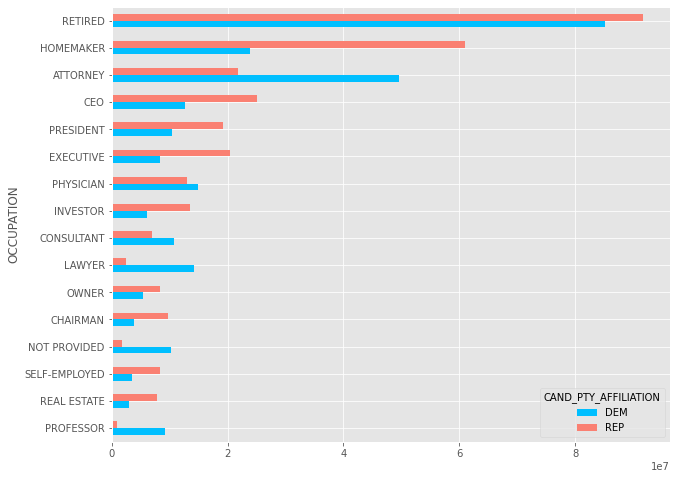

In [31]:
_ = over_10mm.sort_values(by='SUM', ascending=True)[['DEM', 'REP']].\
    plot(kind='barh', color=('deepskyblue', 'salmon'), figsize=(10, 8))

* It might be interesting to see the percentage of donations by profession.

* To do this we should divide each element of the first two columns by the third column (sum).

* Since the division will be done from top to bottom, we will move along axis 0 (`axis=0`).

In [32]:
over_10mm_pct = over_10mm[['DEM', 'REP']].div(over_10mm['SUM'], axis=0)
over_10mm_pct

CAND_PTY_AFFILIATION,DEM,REP
OCCUPATION,,
ATTORNEY,0.694827,0.305173
CEO,0.336699,0.663301
CHAIRMAN,0.283985,0.716015
CONSULTANT,0.605199,0.394801
EXECUTIVE,0.289252,0.710748
HOMEMAKER,0.281072,0.718928
INVESTOR,0.310184,0.689816
LAWYER,0.851161,0.148839
NOT PROVIDED,0.857403,0.142597


* And the corresponding diagram, where since we have percentages, all the bars add up to one.

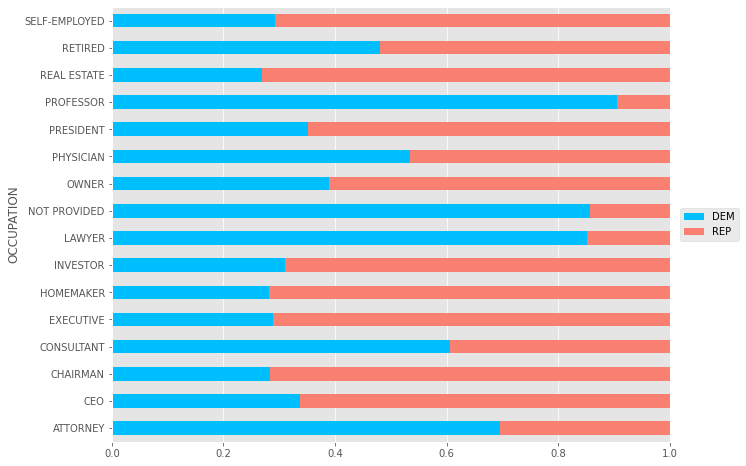

In [33]:
_ = over_10mm_pct.plot(kind='barh', color=('deepskyblue', 'salmon'), stacked=True, figsize=(10, 8))
plt.xlim((0, 1))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

* And having seen the relationship of professions to support for specific parties, let's return to a more basic question.

* How much money did each candidate raise?

In [34]:
fec.groupby('CAND_NAME').sum()

,TRANSACTION_AMT
CAND_NAME,
"OBAMA, BARACK",562711400.0
"ROMNEY, MITT",659176427.0


* This is very paradoxical.

* Mitt Romney appears to have raised more money than Barack Obama.

* It's not what we expected, and it's also not what we find if we look at posts on the internet related to the 2012 election.
